In [3]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node fbffd2bf-1e6b-4546-b240-60eed16c9df4

In [4]:
# Premade libraries
import cv2
import time
import numpy as np
import math
from matplotlib import pyplot as plt
from shapely.geometry import Polygon, Point, LineString

In [5]:
# Homemade functions
import Vision.vision as vs
import robot as rbt
import Global_Navigation.global_navigation as glb
import Motion_Control.thymio_control as ctrl

In [6]:
#cap = cv2.VideoCapture(0)
#img = vs.get_image(cap)
#cap.release()

def get_angle2goal(geometry, goal):
    """
    Compute the angle between the curent orientation of the tymio and its next goal
    :return: beta the angle btw goal/crt orientation
    """
    beta = math.atan2(goal[1] - geometry[1], goal[0] - geometry[0])
    if beta - geometry[2] < -np.pi:
        beta = -(beta - geometry[2] + np.pi)
    elif beta - geometry[2] > np.pi:
        beta = -(beta - geometry[2] - np.pi)
    else:
        beta = beta - geometry[2]
    return beta

def get_correct_orientation(beta, node, speed, tol):
    if abs(beta) < tol:
        print("right angle")
        ctrl.stop_motors(node)
        return(True)
    if beta < 0 :
        ctrl.set_motor_speed(speed, -speed, node)
        return(False)
    elif beta > 0:
        ctrl.set_motor_speed(-speed, speed, node)
        return(False)

def get_distance(pos, goal, tol, speed, node):
    dist = np.linalg.norm((goal[0]-pos[0], goal[1]-pos[1]))
    if dist < tol:
        ctrl.stop_motors(node)
        time.sleep(0.1)
        return True
    else:
        ctrl.set_motor_speed(speed, speed, node)
        return False
    
    
speed = 50
tol = 0.1

geometry = (0,0,0)
goal = (10,10)
beta = get_angle2goal(geometry, goal)
print(beta)
pos = [geometry[0], geometry[1]]

while(abs(beta) > tol):
    print(beta)
    get_correct_orientation(beta, node, speed, tol)
    beta = beta - 0.1
ctrl.stop_motors(node)

while(np.linalg.norm((goal[0]-pos[0], goal[1]-pos[1]))):
    print(pos)
    pos[0] = pos[0] + 1
    pos[1] = pos[1] + 1
    get_distance(pos,goal,1,speed,node)
    

0.7853981633974483
0.7853981633974483
0.6853981633974483
0.5853981633974483
0.48539816339744835
0.38539816339744837
0.2853981633974484
0.18539816339744838
[0, 0]
[1, 1]
[2, 2]
[3, 3]
[4, 4]
[5, 5]
[6, 6]
[7, 7]
[8, 8]
[9, 9]


In [5]:
# Main
# Data
margin = 30

# Initialisation
# Create an instance of our robot
thymio = rbt.RobotNav()
# Start the video capture
cap = cv2.VideoCapture(0)
img = vs.get_image(cap)

avant init
path1
center1
(95.0, 344.0)
center2
(76.0, 310.0)
shapes
start coord
(85.5, 327.0)
(496.0, 178.0)


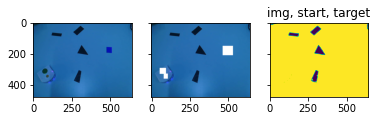

path2
path3
path4


100%|██████████| 3/3 [00:00<00:00, 111.37it/s]

path
[Point(85.50, 327.00), Point(281.10, 268.18), Point(396.62, 238.05), Point(496.00, 178.00)]


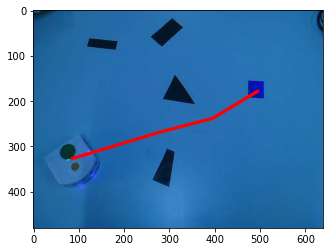

apres init
state updated
avant geom
apres geom
-1.4688973136583545
1.0838970949836275
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186398
1.715757723186

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    i = 0 
    if thymio.get_state() == 0:
        print("avant init")
        thymio.initialisation_step(img, margin, True)
        print("apres init")
        thymio.increase_step()
        thymio.set_state(1)
    elif thymio.get_state() == 1:
        # We use the position determined by the camera
        position, st = vs.detect_start(frame, False, False)
        frame = glb.draw_thymio(frame, position)
        frame = glb.draw_path(frame, thymio.get_path())
        # We update the position of the robot
        if position is not None:
            thymio.update_position_cam(st)
        else:
            thymio.update_position_kalman()
        """
        # We check if the robot encounter an obstacle
            to be implemented
        """
        # We try to reach the next goal
        print("avant geom")
        geometry = thymio.get_geometry()
        print("apres geom")
        #step = thymio.get_crt_step()
        path = thymio.get_path()
        next_node = [path[i+1].x, path[i+1].y]  
        

        beta = get_angle2goal(geometry, next_node)
        #print(beta)
        pos = [geometry[0], geometry[1]]

        while(abs(beta) > tol):
            print(beta)
            geometry = thymio.get_geometry()
            beta = geometry[2]
            get_correct_orientation(beta, node, speed, tol)
            #beta = beta - 0.1
            position, st = vs.detect_start(frame, False, False)
            thymio.update_position_cam(st)
        ctrl.stop_motors(node)

        while(np.linalg.norm((goal[0]-pos[0], goal[1]-pos[1]))):
            print(pos)
            geometry = thymio.get_geometry()
            pos = (geomertry[0],geometry[1])
            
            get_distance(pos,goal,1,speed,node)
            position, st = vs.detect_start(frame, False, False)
            thymio.update_position_cam(st)
        print("apres path")
        ctrl.mov_simplified((geometry[0], geometry[1]), geometry[2], path[i], node) 
        print("apres mov")
        #ctrl.astolfi((geometry[0], geometry[1]), geometry[2], path[step], node) 
        i = thymio.update_step_respo(100,i, False)

    elif thymio.get_state() == 2:
        ctrl.stop_motors(node)
        ctrl.leds_blink(node)
        print('out')
        break # Exits the code


    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [1]:
ctrl.set_motor_speed(0, 0, node)

NameError: name 'ctrl' is not defined

In [ ]:
ctrl.stop_motors(node)